# Deep learning 
#### Final project
#### Yahav & Sapir

In [1]:
# ! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall

tf.compat.v1.disable_eager_execution()

sess = tf.compat.v1.Session()


## import data and split to train/test , x/y and reshape

In [3]:
#there are 24 letters but for the order j get an index althogh j and z dont have data
labels = ['A', 'B', 'C', 'D', 'E',
            'F', 'G', 'H', 'I', 'J',
            'K', 'L', 'M', 'N', 'O',
            'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y']

# Importing the data - test and train
test = pd.read_csv("sign_mnist_test.csv").to_numpy() 
train = pd.read_csv("sign_mnist_train.csv").to_numpy()

# Splitting test into x & y - x = fetures y = labels 
# Note: we do OneHot on the y to get it as a vector at the size of the categories
# then put's 1 where the right label is and zero in the rest
y_test=test[:,0]
y_test=keras.utils.to_categorical(y_test, len(labels))
x_test=test[:,1:]/255

# Splitting data into x & y -> x = fetures y = labels
# Note: we do OneHot on the y to get it as a vector at the size of the categories
# then put's 1 where the right label is and zero in the rest
data_y=train[:,0]
data_y=keras.utils.to_categorical(data_y, len(labels))
data_x=train[:,1:]/255

# Reshape the data from a flat array (1D) to a 28x28 image format (2D) because convolutional neural networks (CNNs) expect input data in the form of images with width height, and channels
data_x = data_x.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


## Print an image from the dataset for example

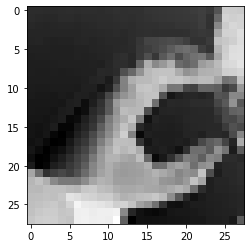

In [4]:
# Print an example image
digit = data_x[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Define the arcitecture of the model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall

# Create a Sequential model
cnn_model = Sequential()

        ##### 1 #####
# Add the first convolutional layer
# - 32 filters of size (3x3)
# - Input shape: (28, 28, 1) indicating 28x28 pixel grayscale images
# - Activation function: Rectified Linear Unit (ReLU)
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Add max-pooling layer to downsample the spatial dimensions
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer to prevent overfitting by randomly deactivating 20% of neurons
cnn_model.add(Dropout(0.2))

        ##### 2 #####
# Add the second convolutional layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max-pooling layer
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer
cnn_model.add(Dropout(0.2))

        ##### 3 #####
# Add the third convolutional layer
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))

# Add max-pooling layer
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer
cnn_model.add(Dropout(0.2))

# Flatten the output from the previous layer to prepare for fully connected layers
cnn_model.add(Flatten())

# Add a fully connected hidden layer with 128 neurons and ReLU activation
cnn_model.add(Dense(128, activation='relu'))

# Add the output layer with the number of neurons equal to the number of labels
# and softmax activation for multi-class classification
cnn_model.add(Dense(len(labels), activation='softmax'))


#### Model summery

In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

## Compile the model

In [7]:
# Compile the model:
# - Optimizer: Adam optimizer for gradient descent
# - Loss function: Categorical Crossentropy for multi-class classification
# - Metrics: Accuracy, Precision, and Recall to monitor model performance
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy', Precision(), Recall()])

## "Fitting" the model

In [ ]:
# Train your model 
history = cnn_model.fit(data_x, data_y, epochs = 20, batch_size = 50, validation_data = (data_x, data_y))


Train on 27455 samples, validate on 27455 samples
Epoch 1/20
27450/27455 [============================>.] - ETA: 0s - loss: 2.0973 - accuracy: 0.3451 - precision: 0.7431 - recall: 0.1595

C:\Users\yahav\anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


27455/27455 [==============================] - 43s 2ms/sample - loss: 2.0971 - accuracy: 0.3451 - precision: 0.7431 - recall: 0.1595 - val_loss: 0.7546 - val_accuracy: 0.7650 - val_precision: 0.8910 - val_recall: 0.5832
Epoch 2/20
27455/27455 [==============================] - 37s 1ms/sample - loss: 0.6842 - accuracy: 0.7684 - precision: 0.8531 - recall: 0.6637 - val_loss: 0.2609 - val_accuracy: 0.9273 - val_precision: 0.9535 - val_recall: 0.8868
Epoch 3/20
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.3473 - accuracy: 0.8814 - precision: 0.9128 - recall: 0.8425 - val_loss: 0.0894 - val_accuracy: 0.9843 - val_precision: 0.9876 - val_recall: 0.9736
Epoch 4/20
27455/27455 [==============================] - 40s 1ms/sample - loss: 0.2200 - accuracy: 0.9275 - precision: 0.9429 - recall: 0.9093 - val_loss: 0.0424 - val_accuracy: 0.9949 - val_precision: 0.9962 - val_recall: 0.9913
Epoch 5/20
27250/27455 [============================>.] - ETA: 0s - loss: 0.1499 - accu

## Plot the metrics

In [ ]:
# Collect metrics during training
accuracy = history.history['accuracy']
precision = history.history['precision']
recall = history.history['recall']

In [ ]:
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(132)
plt.plot(epochs, precision, 'bo-', label='Training Precision')
plt.plot(epochs, history.history['val_precision'], 'ro-', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(133)
plt.plot(epochs, recall, 'bo-', label='Training Recall')
plt.plot(epochs, history.history['val_recall'], 'ro-', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

## Model evaluation

In [ ]:
# Evaluate the model on the test data
evaluation = cnn_model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")
print(f"Test Precision: {evaluation[2]}")
print(f"Test Recall: {evaluation[3]}")

## Model summery

In [ ]:
cnn_model.summary()

## After seeing that there is an overfitting according to the plots, we tried to add regularizers to the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2  # Import the L2 regularizer

# Create a Sequential model
cnn_model = Sequential()

        ##### 1 #####
# Add the first convolutional layer with L2 regularization
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', kernel_regularizer=l2(0.01)))

# Add max-pooling layer
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer
cnn_model.add(Dropout(0.2))

        ##### 2 #####
# Add the second convolutional layer with L2 regularization
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))

# Add max-pooling layer
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer
cnn_model.add(Dropout(0.2))

        ##### 3 #####
# Add the third convolutional layer with L2 regularization
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))

# Add max-pooling layer
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer
cnn_model.add(Dropout(0.2))

# Flatten the output from the previous layer to prepare for fully connected layers
cnn_model.add(Flatten())

# Add a fully connected hidden layer with 128 neurons and ReLU activation with L2 regularization
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

# Add the output layer with the number of neurons equal to the number of labels
# and softmax activation for multi-class classification
cnn_model.add(Dense(len(labels), activation='softmax'))


In [ ]:
# Compile the model with L2 regularization:
# - Optimizer: Adam optimizer for gradient descent
# - Loss function: Categorical Crossentropy for multi-class classification
# - Metrics: Accuracy
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [ ]:
# Train the model 
history = cnn_model.fit(data_x, data_y, epochs=20, batch_size=50, validation_data=(data_x, data_y))


#### New accuracy

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train set', 'validation set'], loc='upper left')
plt.show()

#### New loss func

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train set', 'validation set'], loc = 'upper left')
plt.show()